In [10]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import ndimage as ndi

from scipy.ndimage import label, generate_binary_structure
from sklearn.metrics.pairwise import euclidean_distances

In [11]:
os.getcwd()

'/home/jaeho_ubuntu/Lung/notebook'

In [12]:
IMAGE_DIR = '/home/LUNG_DATA/Image_1'
MASK_DIR = '/home/LUNG_DATA/Mask_1'
CLEAN_DIR_IMG ='/home/LUNG_DATA/Clean/Image_1'
CLEAN_DIR_MASK ='/home/LUNG_DATA/Clean/Mask_1'
PREDICT_DIR = '/home/LUNG_DATA/Segmentation_output/UNET_base/'

In [13]:
pid_list = os.listdir(PREDICT_DIR)[:10]

In [14]:
pid_list[0]

'0002_PD000_slice005.npy'

In [17]:
def view_img(MASK_DIR,PREDICT_DIR,IMAGE_DIR):
    
    for prediction in os.listdir(PREDICT_DIR)[30:60]:
        pid = 'LIDC-IDRI-'+prediction[:4]
        mask_id = prediction.replace('PD','MA')
        image_id = prediction.replace('PD','NI')
        
        original_img= np.load(IMAGE_DIR+'/'+pid+'/'+image_id)
        mask_img= np.load(MASK_DIR+'/'+pid+'/'+mask_id)
        predict_mask =np.load(PREDICT_DIR+'/'+prediction)

        fig,ax = plt.subplots(1,3, figsize=(15,15))
        print(pid,prediction)
        ax[0].title.set_text('Original image')
        ax[0].imshow(original_img)
        ax[0].grid()
        ax[1].title.set_text('Mask image')
        ax[1].imshow(mask_img)
        ax[1].grid()
        ax[2].title.set_text('Predicted Mask image')
        ax[2].imshow(predict_mask)
        ax[2].grid()
        plt.show()


LIDC-IDRI-0015 0015_PD000_slice010.npy


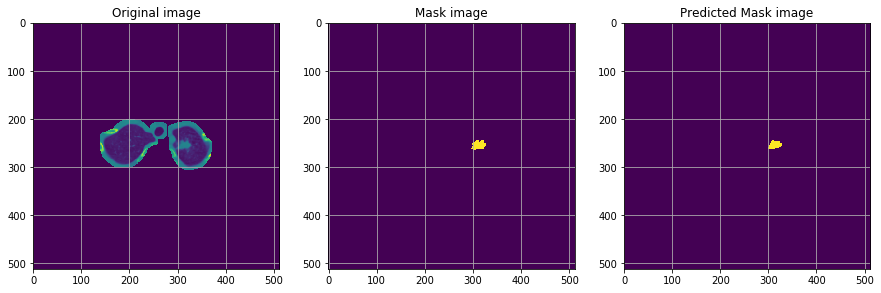

LIDC-IDRI-0015 0015_PD000_slice011.npy


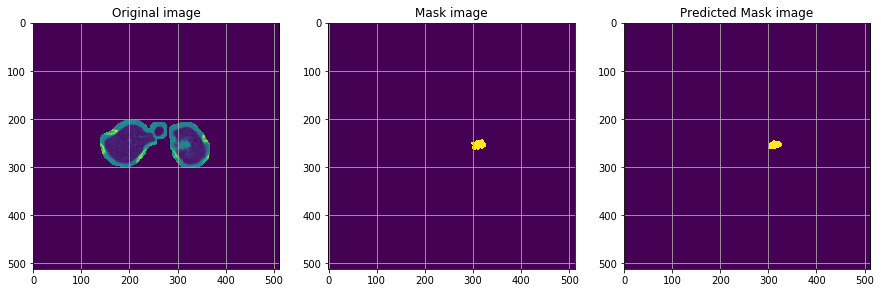

LIDC-IDRI-0015 0015_PD000_slice012.npy


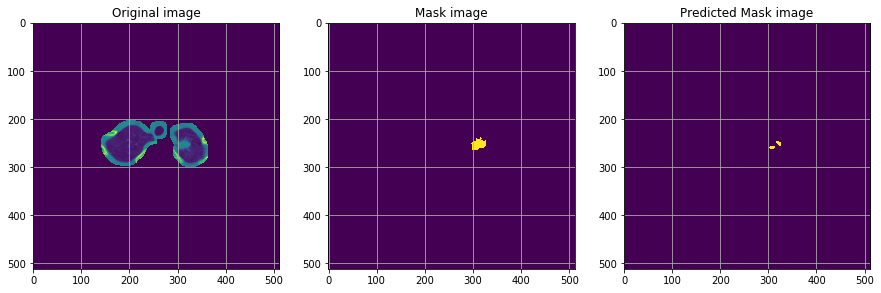

LIDC-IDRI-0015 0015_PD000_slice013.npy


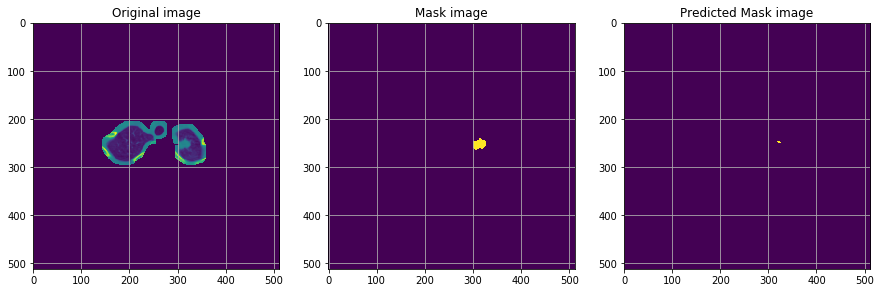

LIDC-IDRI-0015 0015_PD000_slice014.npy


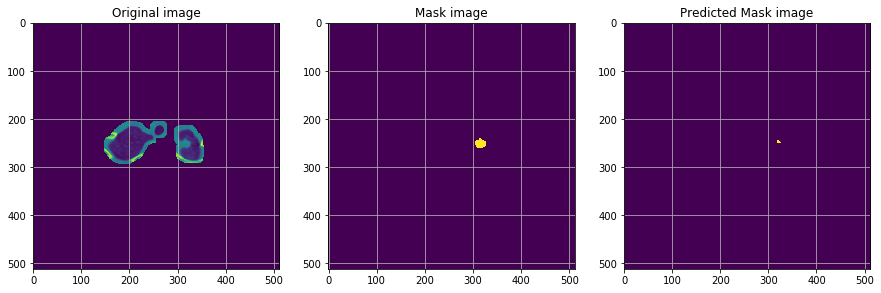

LIDC-IDRI-0015 0015_PD000_slice015.npy


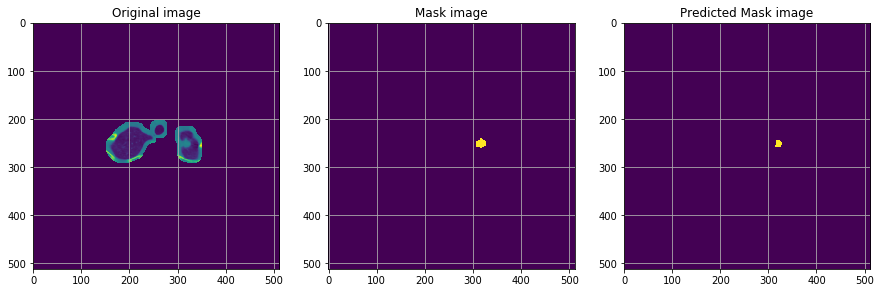

LIDC-IDRI-0015 0015_PD000_slice016.npy


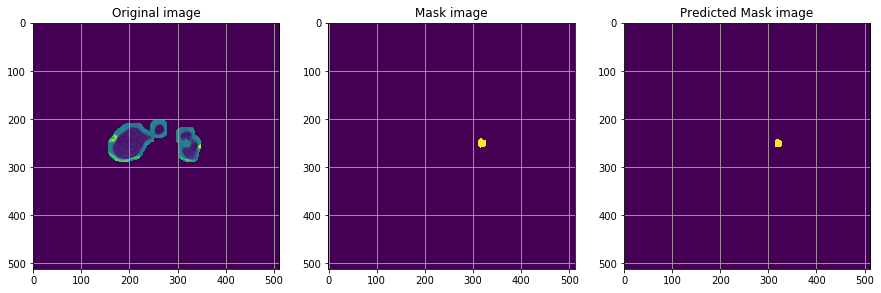

LIDC-IDRI-0015 0015_PD000_slice017.npy


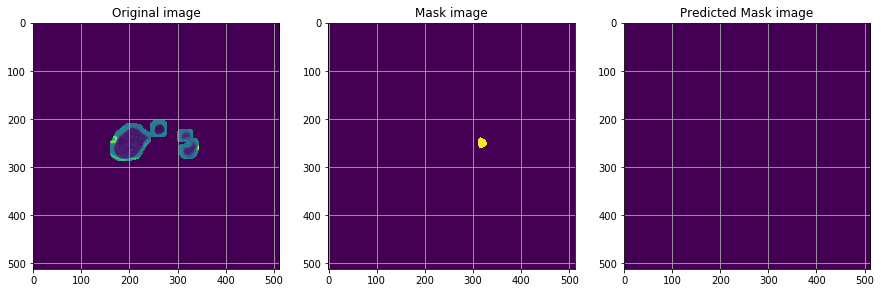

LIDC-IDRI-0018 0018_PD000_slice001.npy


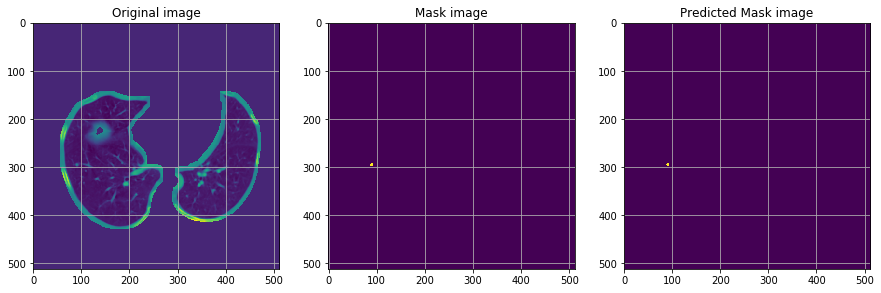

LIDC-IDRI-0018 0018_PD000_slice002.npy


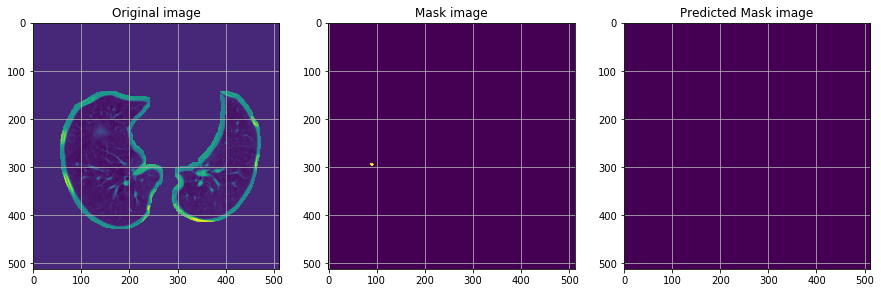

LIDC-IDRI-0018 0018_PD001_slice001.npy


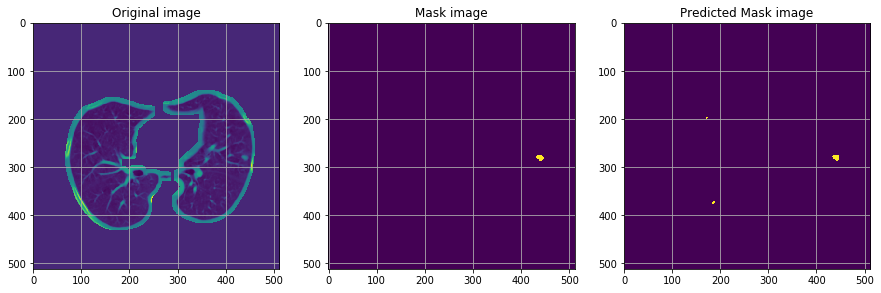

LIDC-IDRI-0018 0018_PD001_slice002.npy


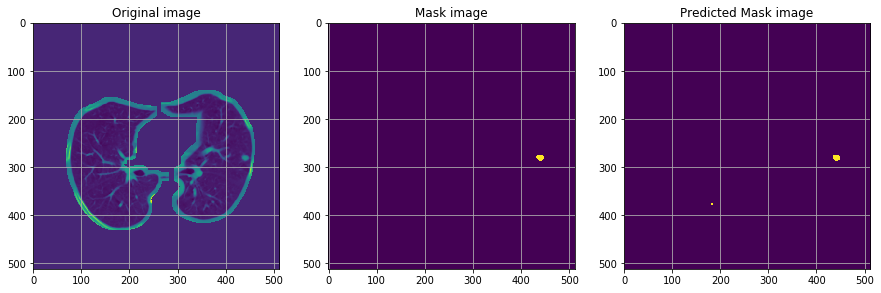

LIDC-IDRI-0018 0018_PD001_slice003.npy


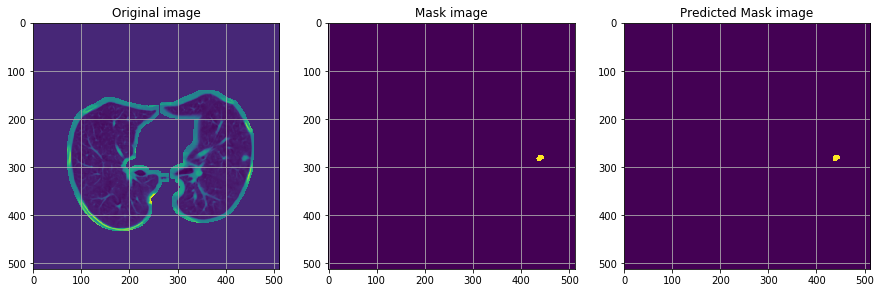

LIDC-IDRI-0018 0018_PD001_slice004.npy


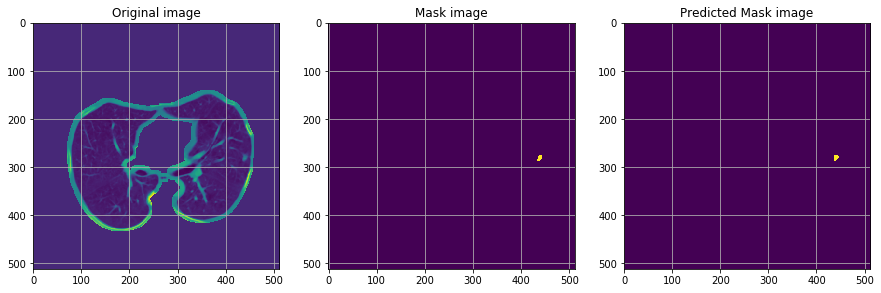

LIDC-IDRI-0018 0018_PD002_slice000.npy


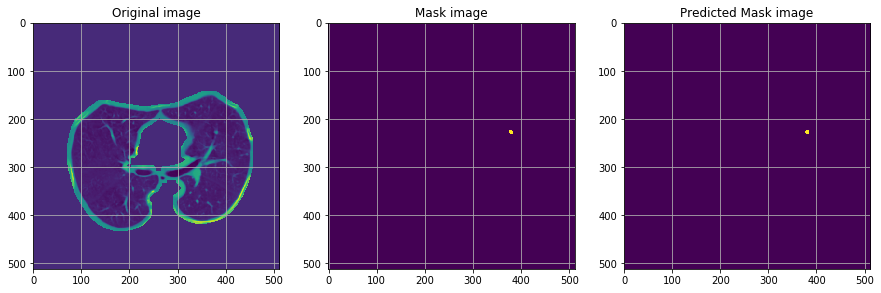

LIDC-IDRI-0018 0018_PD002_slice001.npy


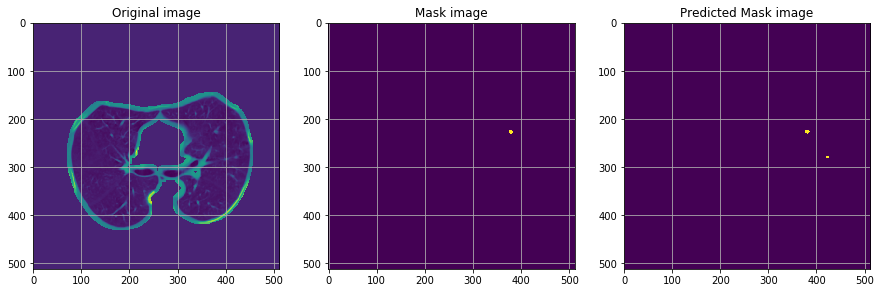

LIDC-IDRI-0018 0018_PD003_slice000.npy


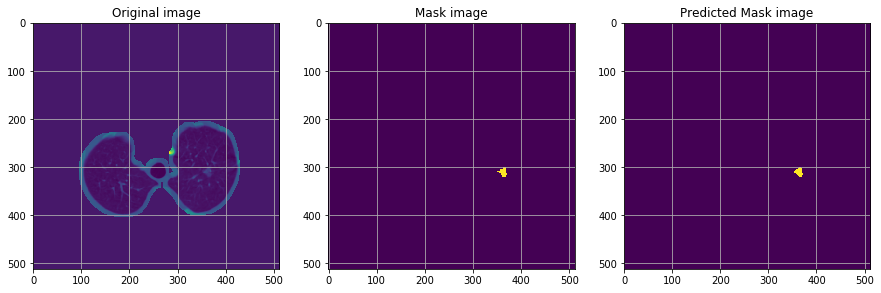

LIDC-IDRI-0018 0018_PD003_slice001.npy


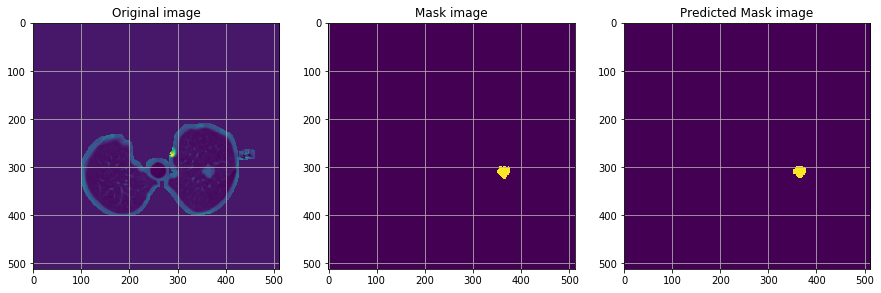

LIDC-IDRI-0018 0018_PD003_slice002.npy


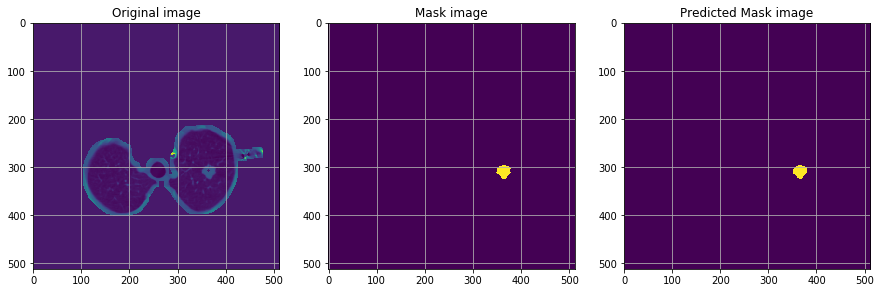

LIDC-IDRI-0018 0018_PD003_slice003.npy


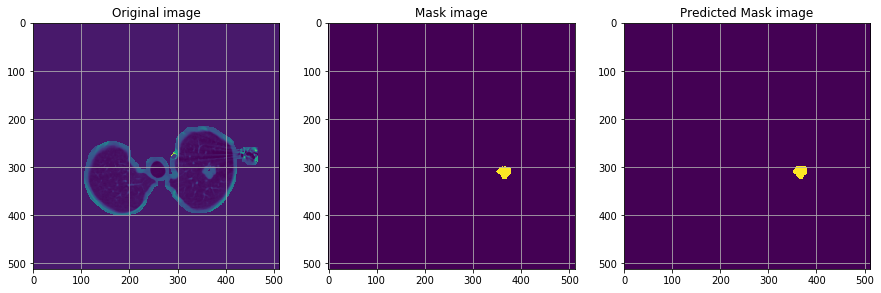

LIDC-IDRI-0018 0018_PD003_slice004.npy


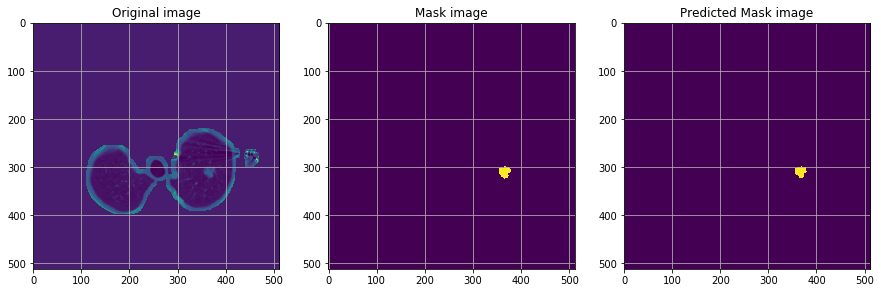

LIDC-IDRI-0018 0018_PD003_slice005.npy


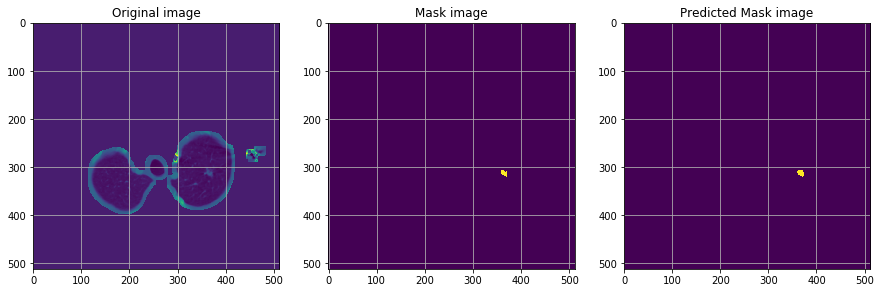

LIDC-IDRI-0019 0019_PD000_slice002.npy


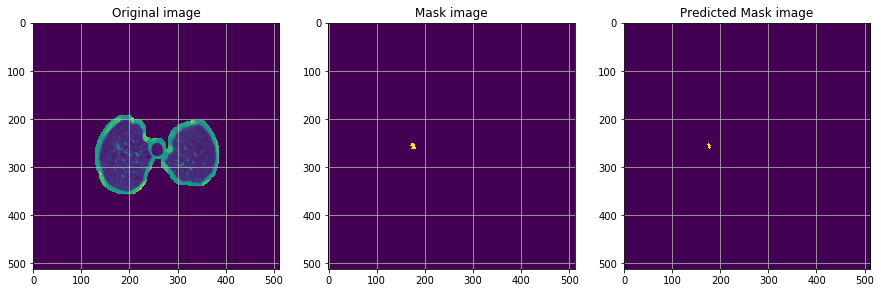

LIDC-IDRI-0019 0019_PD000_slice003.npy


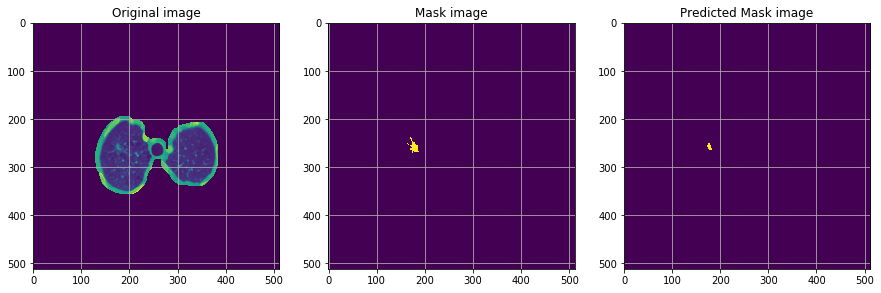

LIDC-IDRI-0019 0019_PD000_slice004.npy


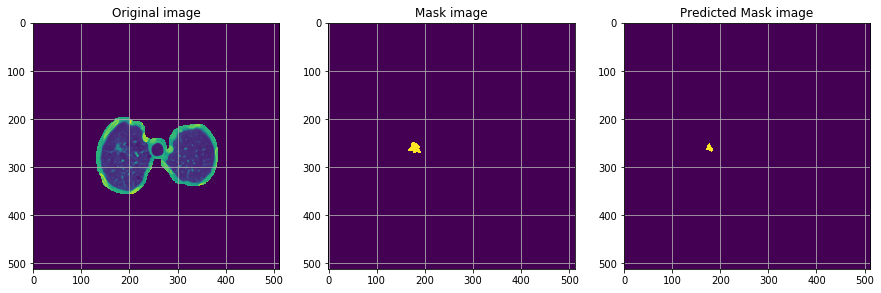

LIDC-IDRI-0019 0019_PD000_slice005.npy


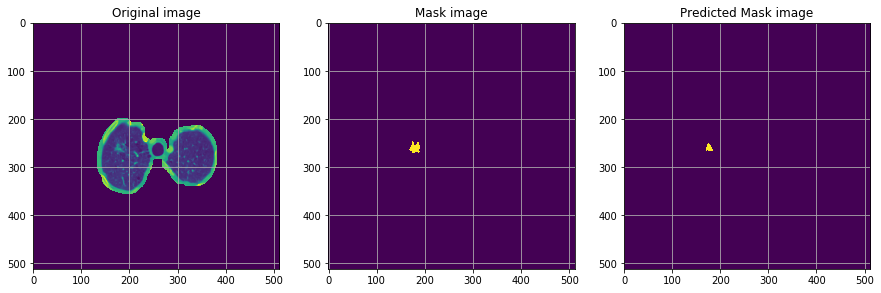

LIDC-IDRI-0019 0019_PD000_slice006.npy


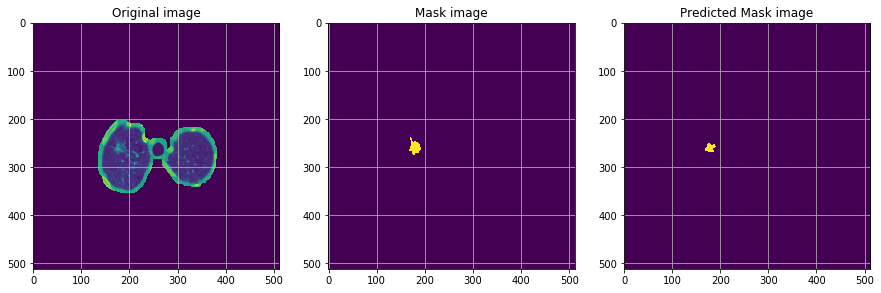

LIDC-IDRI-0019 0019_PD000_slice007.npy


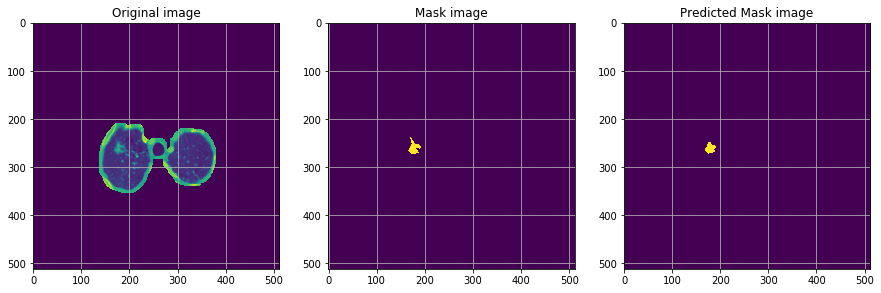

LIDC-IDRI-0019 0019_PD000_slice008.npy


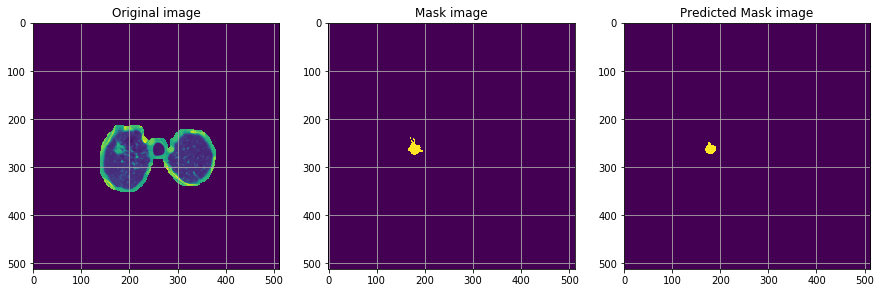

LIDC-IDRI-0019 0019_PD000_slice009.npy


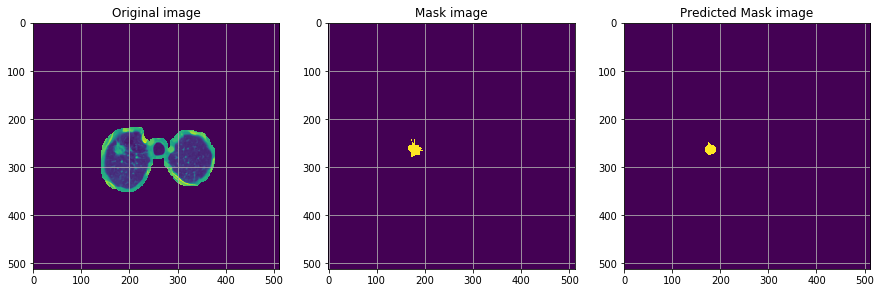

In [18]:
view_img(MASK_DIR,PREDICT_DIR,IMAGE_DIR)

In [ ]:
0018_PD000_slice002.npy

In [20]:
#original = np.load(IMAGE_DIR+'/LIDC-IDRI-0018/0008_NI000_slice002.npy')
predict = np.load(PREDICT_DIR+'0018_PD000_slice002.npy')
answer = np.load(MASK_DIR+'/LIDC-IDRI-0018/0018_MA000_slice002.npy')

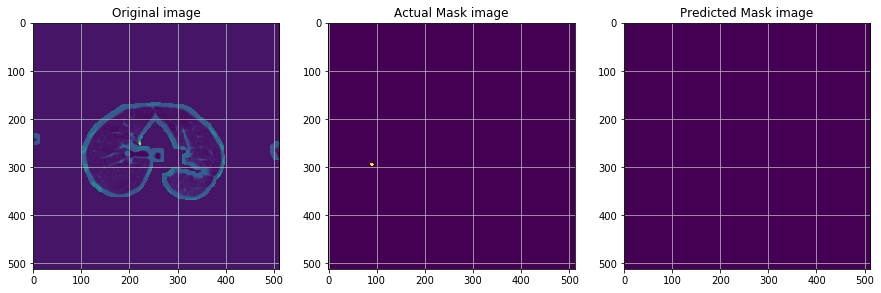

In [21]:
fig,ax = plt.subplots(1,3, figsize=(15,15))
ax[0].title.set_text('Original image')
ax[0].imshow(original)
ax[0].grid()
ax[1].title.set_text('Actual Mask image')
ax[1].imshow(answer)
ax[1].grid()
ax[2].title.set_text('Predicted Mask image')
ax[2].imshow(predict)
ax[2].grid()
plt.savefig("prediction_distance_comparison.png",dpi=300)
plt.show()

In [29]:
ndi.center_of_mass(predict)[0]==np.nan

/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:1328: RuntimeWarning: invalid value encountered in double_scalars
  for dir in range(input.ndim)]


False

In [30]:
np.isnan(ndi.center_of_mass(predict)[0])

/home/ubuntu/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:1328: RuntimeWarning: invalid value encountered in double_scalars
  for dir in range(input.ndim)]


True

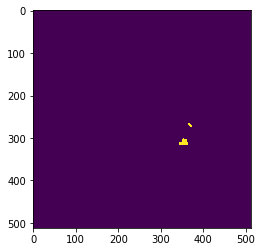

In [64]:
plt.imshow(predict)

In [65]:
s = generate_binary_structure(2,2)

In [71]:
labeled_array, num_features = label(predict, structure=s)

In [72]:
num_features

2

In [73]:
labeled_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [82]:
n=1
lab=np.array(labeled_array)
lab[lab!=(n+1)]=0
lab[lab==(n+1)]=1

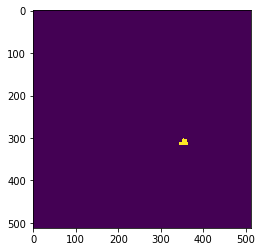

In [83]:
plt.imshow(lab)

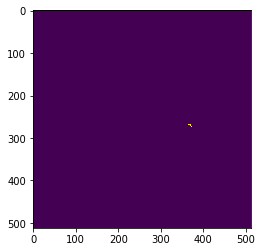

In [84]:
plt.imshow(answer)

In [85]:
np.sum(lab)

230

In [86]:
com= ndi.center_of_mass(lab)
com

(310.23478260869564, 353.7608695652174)

In [87]:
com_answer= ndi.center_of_mass(answer)

In [88]:
com_answer

(269.8965517241379, 368.6551724137931)

In [89]:
np.linalg.norm(np.array(com)-np.array(com_answer),2)

43.00015265369389

In [125]:
def calculate_fp(prediction_dir,mask_dir,distance_threshold=80):
    """This calculates the fp by comparing the predicted mask and orginal mask"""
    #TP,TN,FP,FN
    #FN will always be zero here as all the mask contains a nodule
    confusion_matrix =[0,0,0,0]
    s = generate_binary_structure(2,2)
    for prediction in os.listdir(PREDICT_DIR)[:10]:
        #print(confusion_matrix)
        pid = 'LIDC-IDRI-'+prediction[:4]
        mask_id = prediction.replace('PD','MA')
        mask = np.load(mask_dir+'/'+pid+'/'+mask_id)
        predict = np.load(prediction_dir+prediction)
        answer_com = np.array(ndi.center_of_mass(mask))
        # Patience is used to check if the patch has cropped the same image
        patience =0
        labeled_array, nf = label(predict, structure=s)
        if nf>0:
            for n in range(nf):
                lab=np.array(labeled_array)
                lab[lab!=(n+1)]=0
                lab[lab==(n+1)]=1
                predict_com=np.array(ndi.center_of_mass(labeled_array))
                if np.linalg.norm(predict_com-answer_com,2) < distance_threshold:
                    if patience != 0:
                        #print("HIT")
                        continue
                    # add true positive
                    confusion_matrix[0]+=1
                    patience +=1
                else:
                    confusion_matrix[2]+=1
                
        else:
            # Add True Negative since the UNET didn't detect a cancer even when there was one
            confusion_matrix[1]+=1
        
    return confusion_matrix
        
        #[1848, 719, 1309, 0]

In [126]:
confusion_matrix = calculate_fp(PREDICT_DIR,MASK_DIR,distance_threshold=60)

In [127]:
confusion_matrix

[8, 1, 2, 0]

In [101]:
confusion_matrix =[0,0,0,0]

In [15]:
np.sum(testing)

0.0

In [10]:
ndi.center_of_mass(mask)

(197.53549517966695, 111.64504820333042)

In [11]:
ndi.center_of_mass(predict)

(197.27844073598493, 119.18674498223672)

In [12]:
def crop_patch(image,mask):
    return crop_nodule(ndi.center_of_mass(mask),image)
    

In [13]:
patch= crop_patch(original,mask)

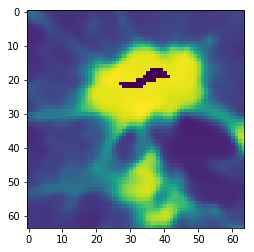

In [14]:
plt.imshow(patch)

In [15]:
from scipy import signal

xder = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
yder = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
smooth = np.array([[1,1,1],[1,5,1],[1,1,1]])
xder2 = np.array([[-1,2,-1],[-3,6,-3],[-1,2,-1]])
yder2 = np.array([[-1,-3,-1],[2,6,2],[-1,-3,-1]])

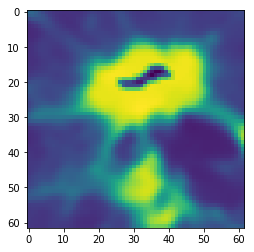

In [16]:
plt.imshow(signal.convolve2d(patch,smooth,mode='valid'))

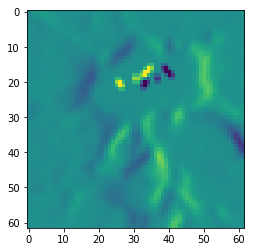

In [17]:
plt.imshow(signal.convolve2d(patch,xder,mode='valid'))

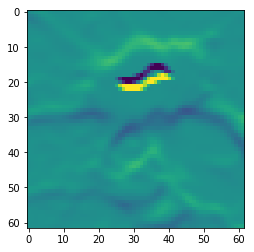

In [18]:
plt.imshow(signal.convolve2d(patch,yder,mode='valid'))

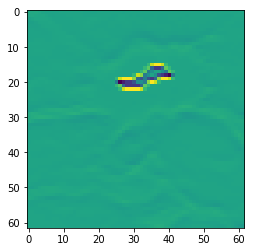

In [19]:
plt.imshow(signal.convolve2d(patch,yder2,mode='valid'))

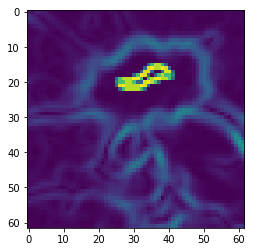

In [20]:
arrx = signal.convolve2d(patch,xder,mode='valid')
arry = signal.convolve2d(patch,yder,mode='valid')
plt.imshow(np.hypot(arrx,arry))

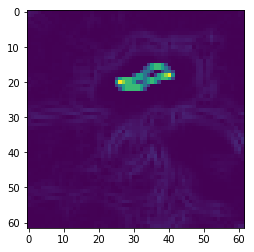

In [21]:
arrx = signal.convolve2d(patch,xder2,mode='valid')
arry = signal.convolve2d(patch,yder2,mode='valid')
plt.imshow(np.hypot(arrx,arry))

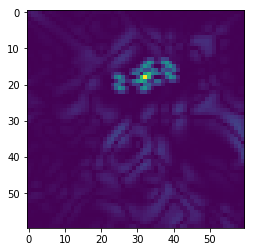

In [22]:
arrx = signal.convolve2d(patch,xder,mode='valid')
arry = signal.convolve2d(patch,yder,mode='valid')
arrx = signal.convolve2d(arrx,yder,mode='valid')
arry = signal.convolve2d(arry,xder,mode='valid')
plt.imshow(np.hypot(arrx,arry))

In [ ]:
def create_tp_coordinates(mask_answer_dir,patient_list):
    """ Creates dataframe storing TP coordinates"""
    df= pd.DataFrame(index=[],columns= ['file_name','nodule_no','tp_x_coord','tp_y_coord'])
    
    for file in patient_list:
        mask = np.load(mask_answer_dir+file)        
        try:
            com = ndi.center_of_mass(mask)
            tmp = pd.Series([file,1,int(com[1]),int(com[0])],index=['file_name','nodule_no','tp_x_coord','tp_y_coord'])
            df = df.append(tmp,ignore_index=True)
        except ValueError:
            #ValueError occurs because the answer sheet doesn't contain any nodule
            #There are answer sheet like these because the U-Net predicted there is a nodule
            continue
            
    return df